### 2021_10_18_5

## DBSCAN : Density-Based Clustering Applications with Noise

### 01. DBSCAN
* 유용한 군집(Clustering) 알고리즘이다.
* 데이터의 밀집 지역이 한 클러스터를 구성하며 비교적 비어 있는 지역을 경계로 다른 클러스터와 구분이 된다.

### 02. DBSCAN의 장점
* 클러스터 개수를 미리 지정할 필요가 없다.
* 병합 군집이나 k-평균보다는 다소 느리지만 비교적 큰 데이터셋에도 적용이 가능하다.
* 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있다.

### 03. DBSCAN의 원리
* 알고리즘은 방문하지 않은 임의의 지점에서 시작한다. 주변 정보는 eps의 매개변수에 의해 검색된다.
* 특성 공간에서 가까이 있는 데이터가 많아 붐비는 지역의 포인트를 찾는다.
* 밀집 지역(dense region) - 붐비는 지역을 말한다.
* DBSCAN의 아이디어는 데이터의 밀집 지역이 한 클러스터를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터와 구분된다는 것이다.

In [11]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system()== "Darwin":
    rc('font', family = 'AppleGothic')
else:
    print("Unknown System")
    
### 마이너스 설정
from matplotlib import rc
matplotlib.rc("axes", unicode_minus=False)

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


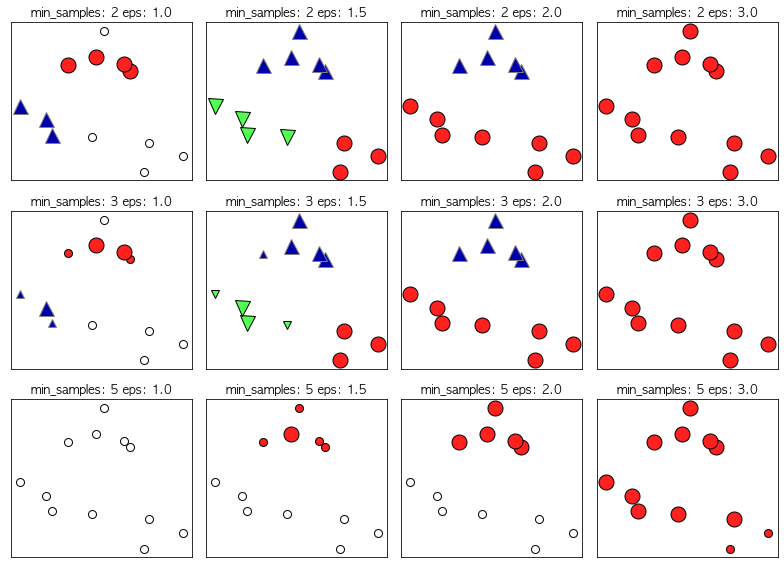

In [3]:
import mglearn

mglearn.plots.plot_dbscan()

### 실습해보기
### 데이터 준비 및 스케일 조정

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

# 평균 0, 분산 1이 되도록 데이터 스케일 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

* 병합군집과 마찬가지로 DBSCAN은 새로운 데이터에 대해 예측할 수 없어, fit_predict 메소드를 사용한다.

In [5]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
clusters

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

Text(0, 0.5, '특성 1')

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


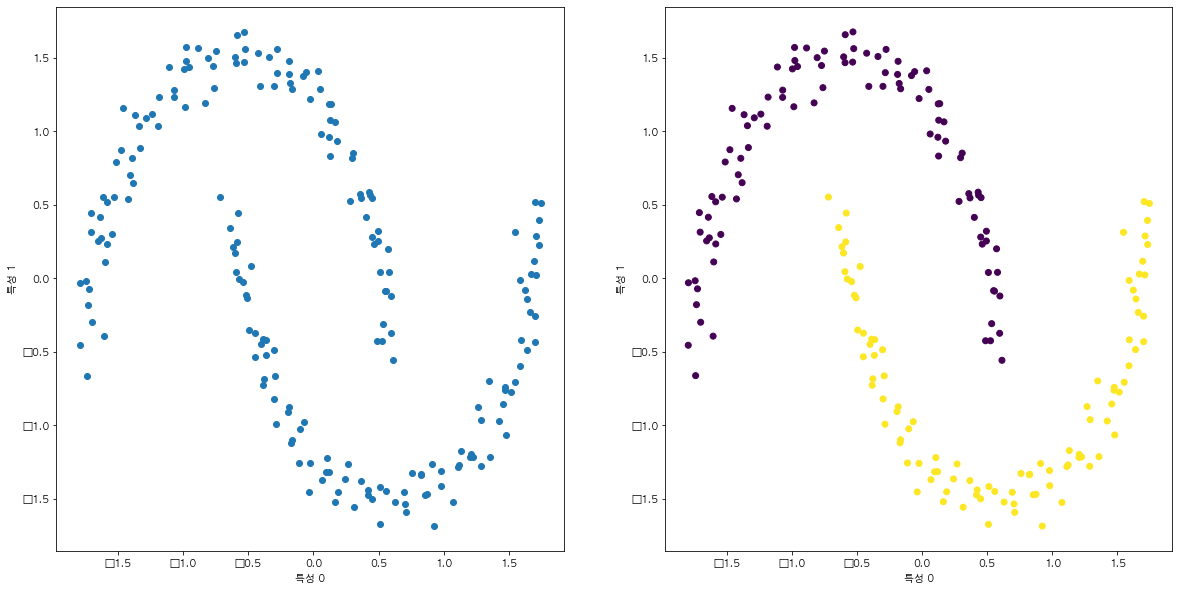

In [6]:
# 원래 데이터 그래프
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)   # 2행 1열에 첫번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2)  # 원본 샘플 데이터 
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# DBSCAN 적용한 그래프
plt.subplot(1,2,2)   # 2행 1열에 두번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2, c=clusters) # DBSCAN 적용한 샘플 데이터
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### K-means와 DBSCAN 시각화 비교

In [7]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters = 2)
kmeans_clusters = kmeans.fit_predict(X_scaled)
kmeans_clusters

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1], dtype=int32)

Text(0.5, 1.0, 'DBSCAN')

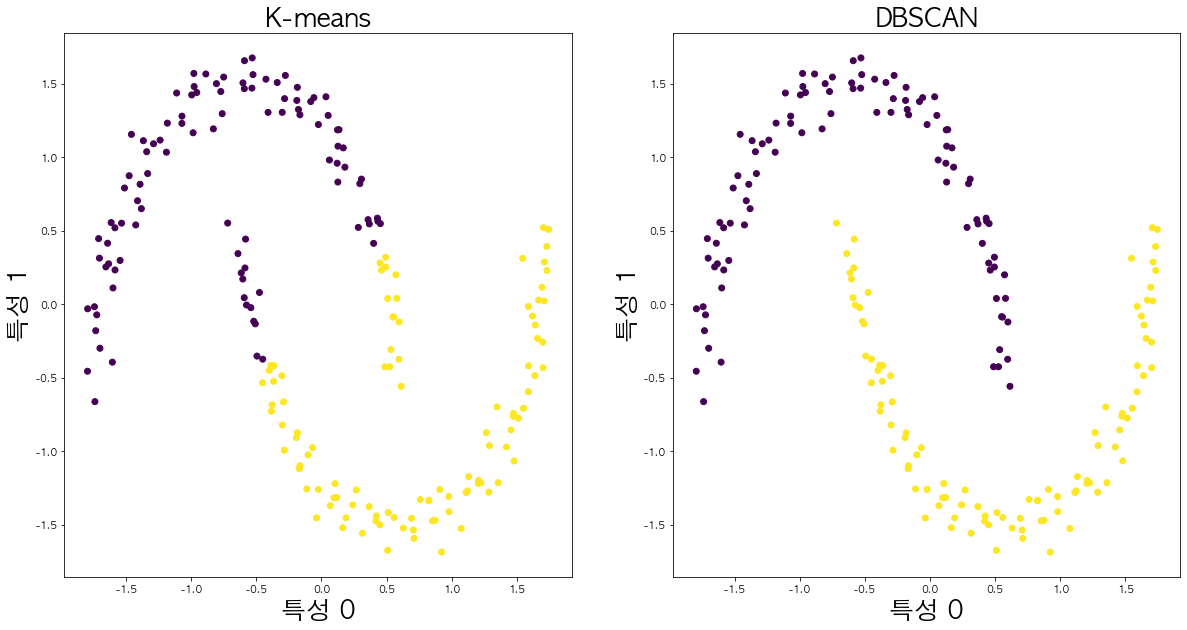

In [12]:
# 원래 데이터 그래프
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)   # 2행 1열에 첫번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2, c = kmeans_clusters)  # 원본 샘플 데이터 
plt.xlabel("특성 0", fontdict = {"fontsize" : 25})
plt.ylabel("특성 1", fontdict = {"fontsize" : 25})
plt.title("K-means", fontdict = {"fontsize" : 25})

# DBSCAN 적용한 그래프
plt.subplot(1,2,2)   # 2행 1열에 두번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2, c=clusters) # DBSCAN 적용한 샘플 데이터
plt.xlabel("특성 0", fontdict = {"fontsize" : 25})
plt.ylabel("특성 1", fontdict = {"fontsize" : 25})
plt.title("DBSCAN", fontdict = {"fontsize" : 25})